In [12]:
import pandas as pd
import numpy as np
from src import soporte as sp

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/union_tablas.csv")
df.head()

,Unnamed: 0,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,2,100018,2017,3,14,3,17,2533,253.0,438,36,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


# FASE 2
## Visualización

In [5]:
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
df_año_mes = df.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()

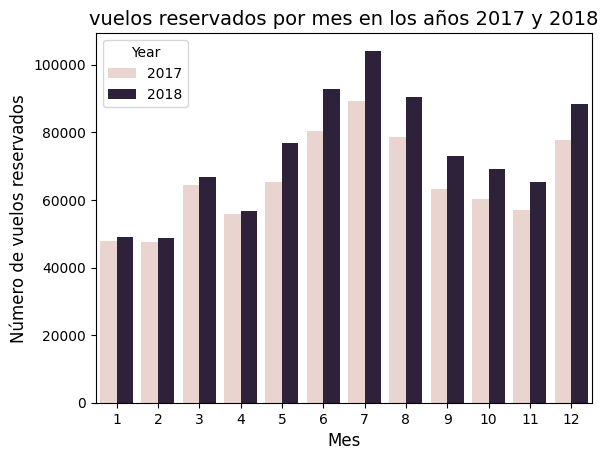

In [6]:
sns.barplot(x='Month', y='Flights Booked', hue='Year', data=df_año_mes)
# Personalización del gráfico
plt.title('vuelos reservados por mes en los años 2017 y 2018', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de vuelos reservados', fontsize=12);

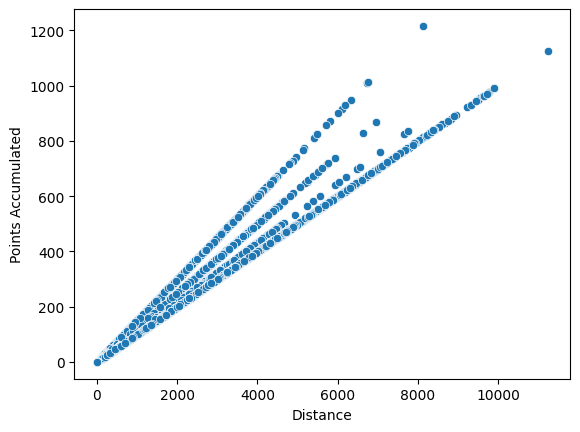

In [7]:
#¿Existe una relación entre ladistancia de los vuelos y los puntos acumulados por los clientes?

sns.scatterplot(x="Distance", y="Points Accumulated", data=df);

In [10]:
correlacion_distance_points = df[["Points Accumulated", "Distance"]]
correlacion_distance_points

,Points Accumulated,Distance
0,152.0,1521
1,132.0,1320
2,253.0,2533
3,92.0,924
4,0.0,0
...,...,...
401683,367.0,3672
401684,0.0,0
401685,70.0,708
401686,204.0,2040


In [13]:
df_correlaciones = correlacion_distance_points.corr( method = "pearson")
df_correlaciones
# correlacion positiva fuerte, al ser casi 1. 

,Points Accumulated,Distance
Points Accumulated,1.00000,0.99453
Distance,0.99453,1.00000


In [14]:
#¿Cuál es la distribución de los clientes por provincia o estado?

df_provincias = df.groupby("Province")["Loyalty Number"].count().reset_index().sort_values("Loyalty Number", ascending=False).reset_index(drop=True)
df_provincias

,Province,Loyalty Number
0,Ontario,129696
1,British Columbia,105816
2,Quebec,79200
3,Alberta,23256
4,Manitoba,15792
5,New Brunswick,15264
6,Nova Scotia,12432
7,Saskatchewan,9816
8,Newfoundland,6192
9,Yukon,2640


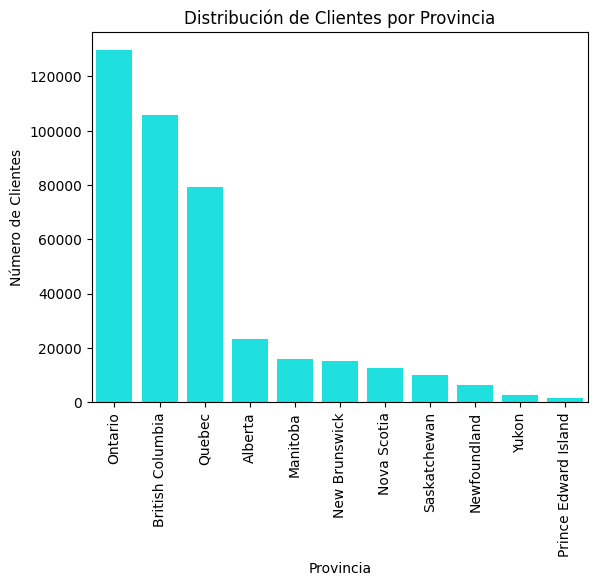

In [15]:
sns.barplot(x="Province", y= "Loyalty Number", data=df_provincias, color="cyan")
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90);

In [16]:
# ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
salario_promedio = df.groupby("Education")["Salary"].mean().reset_index().sort_values("Salary", ascending=False).reset_index(drop=True)
salario_promedio

,Education,Salary
0,Doctor,178608.897820
1,Master,103757.848425
2,Bachelor,72577.254415
3,High School or Below,61199.161125
4,College,NaN


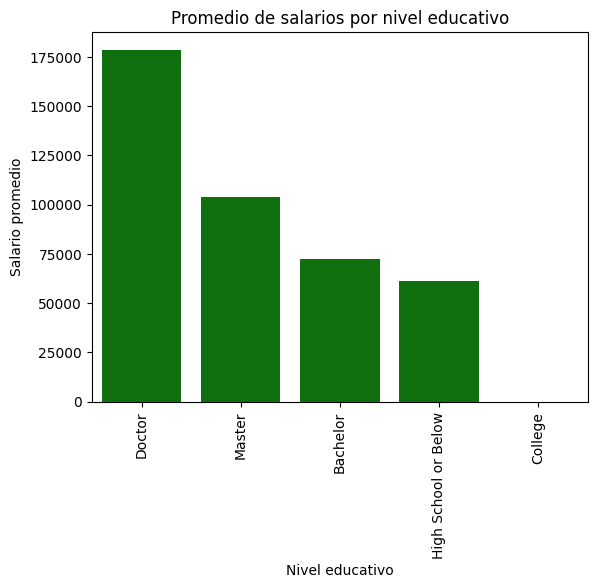

In [17]:
sns.barplot(x="Education", y= "Salary", data=salario_promedio, color="green")
plt.title('Promedio de salarios por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=90);